### Time Series Forecasting with Prophet

In [94]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [95]:
df= pd.read_csv("Data/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


* The Prophet library expects as input a DataFrame with one column containing the time information, and another column containing the metric that we wish to forecast. Importantly, the time column is expected to be of the datetime type, so let’s check the type of our columns:

In [96]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

* Because the Month column is not of the datetime type, we’ll need to convert it:

In [97]:
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

* We now see that our Month column is of the correct datetime type.

- Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let’s rename the columns in our DataFrame:

In [98]:
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


* It is good practice to visualize the data we are going to be working with, so let’s plot our time series:

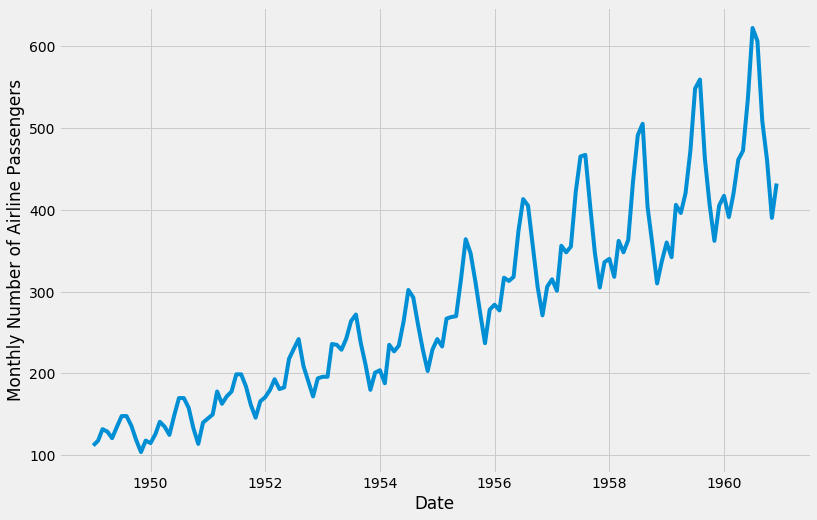

In [99]:
figure,ax=plt.subplots(figsize=(12,8))
ax.plot(df.ds, df.y)
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

* With our data now prepared, we are ready to use the Prophet library to produce forecasts of our time series.

### Time Series Forecasting with Prophet

- To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [100]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

- Now that our Prophet model has been initialized, we can call its fit method with our DataFrame as input. The model fitting should take no longer than a few seconds.

In [101]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the `make_future_dataframe` helper function:

In [103]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


- In the code chunk above, we instructed Prophet to generate 36 datestamps in the future.

- When working with Prophet, it is important to consider the frequency of our time series. Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month). Therefore, the make_future_dataframe generated 36 monthly timestamps for us. In other words, we are looking to predict future values of our time series 3 years into the future.

- The DataFrame of future dates is then used as input to the predict method of our fitted model.

In [105]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.511816,603.857532,694.636877
176,1963-09-01,601.983199,559.932586,648.184458
177,1963-10-01,565.980192,518.863158,612.145772
178,1963-11-01,534.021253,491.740521,575.166300
179,1963-12-01,563.611828,517.418240,607.817414


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

- `ds`: the datestamp of the forecasted value
- `yhat`: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value `y`)
- `yhat_lower`: the lower bound of our forecasts
- `yhat_upper`: the upper bound of our forecasts

A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts:

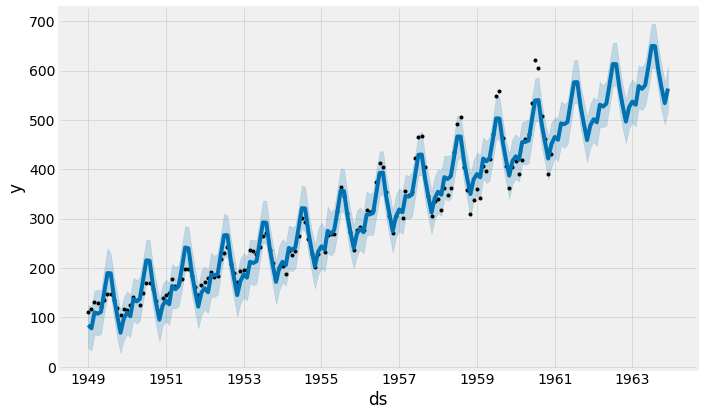

In [110]:
# Note the ";" at the end, otherwise you get 2 plots
my_model.plot(forecast,
              uncertainty=True);

- Prophet plots the observed values of our time series `(the black dots)`, the forecasted values `(blue line)` and the uncertainty intervals of our forecasts `(the blue shaded regions)`.

- One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values:

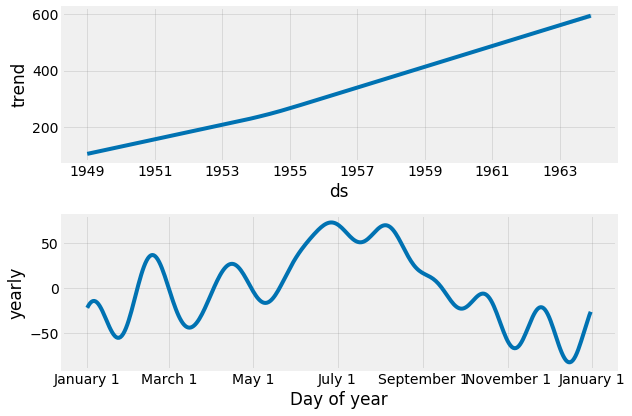

In [113]:
my_model.plot_components(forecast);

The plot above provides interesting insights.
- The first plot shows that the monthly volume of airline passengers has been linearly increasing over time. 
- The second plot highlights the fact that the weekly count of passengers peaks towards the end of the week and on Saturday,
- while the third plot shows that the most traffic occurs during the holiday months of July and August.